importing the dependicies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data collection and processesing

In [ ]:
# loading data from csv file to a Pandas  DataFrame
insuranceDataSet = pd.read_csv("/content/insurance.csv")

In [ ]:
# first five rows of data frame
insuranceDataSet.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Train the machine learning model

In [ ]:
# get number of rows and columns total of data
insuranceDataSet.shape

(1338, 7)

In [ ]:
insuranceDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical features:
-sex
-smoker
-region

In [ ]:
# check for missing values
insuranceDataSet.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data analysis

In [ ]:
# stats of dataset (for numerical features)
insuranceDataSet.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-8-5cdc13767816>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insuranceDataSet['age'])


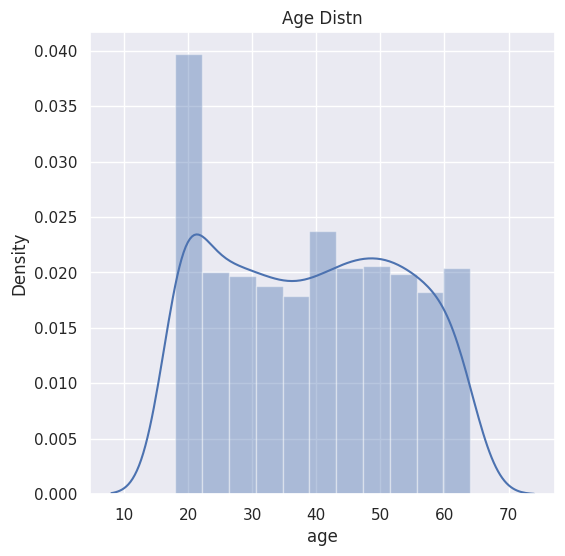

In [ ]:
# get the distribution of the age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insuranceDataSet['age'])
plt.title('Age Distn')
plt.show()

Text(0.5, 1.0, 'sex distn')

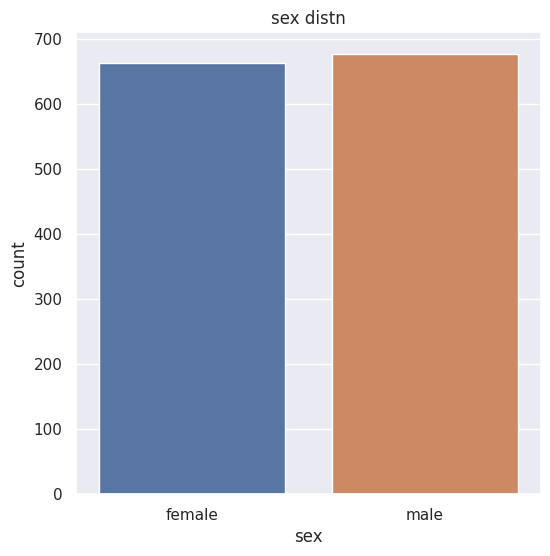

In [ ]:
# Sex column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insuranceDataSet)
plt.title("sex distn")

In [ ]:
insuranceDataSet['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-11-624c467fdc14>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insuranceDataSet['bmi'])


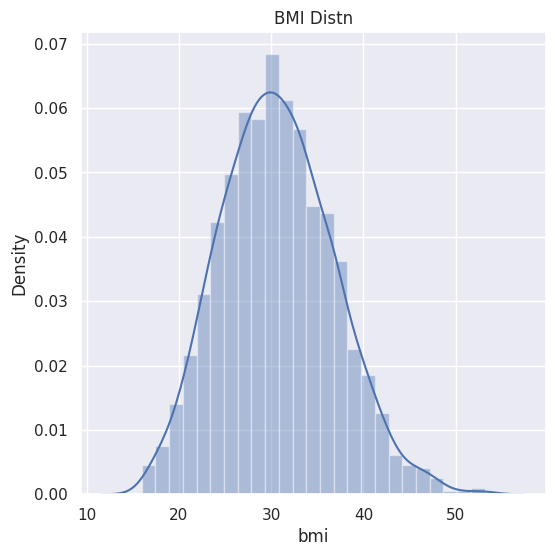

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(insuranceDataSet['bmi'])
plt.title('BMI Distn')
plt.show()

 Normal BMI Range = 18.5 -> 24.9
A lot of people in this dataset are overweight, therefore increasing insurance cost.

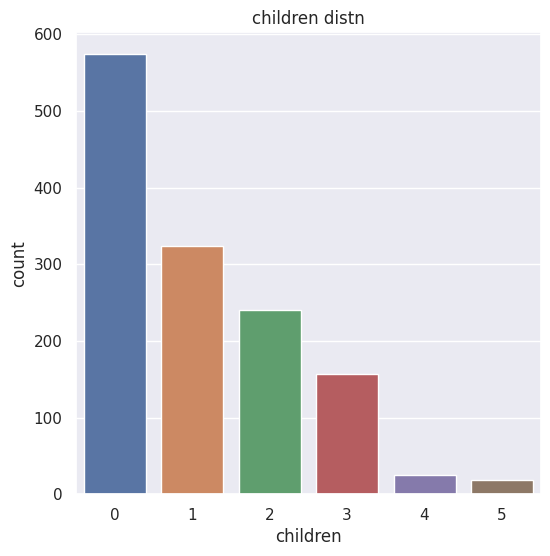

In [ ]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x="children",data=insuranceDataSet)
plt.title("children distn")
plt.show()

In [ ]:
insuranceDataSet['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

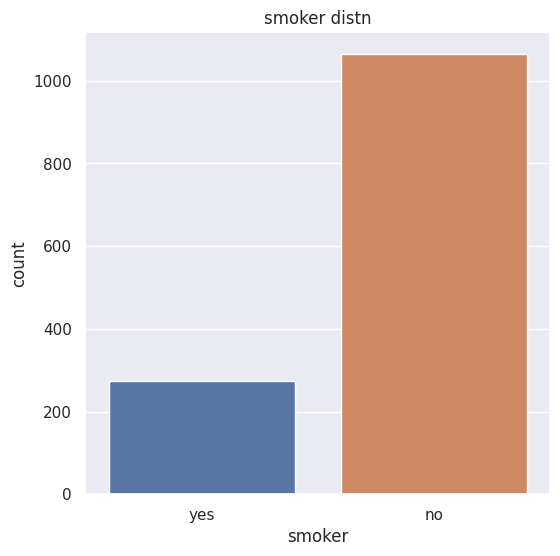

In [ ]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x="smoker",data=insuranceDataSet)
plt.title("smoker distn")
plt.show()

In [ ]:
insuranceDataSet['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

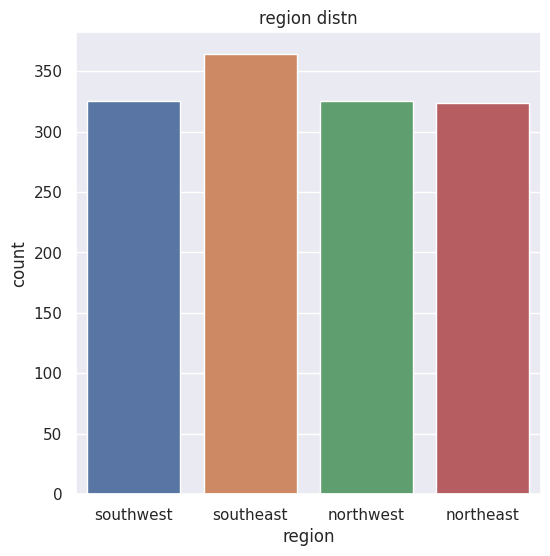

In [ ]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x="region",data=insuranceDataSet)
plt.title("region distn")
plt.show()

In [ ]:
insuranceDataSet['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-18-6519e282433b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insuranceDataSet['charges'])


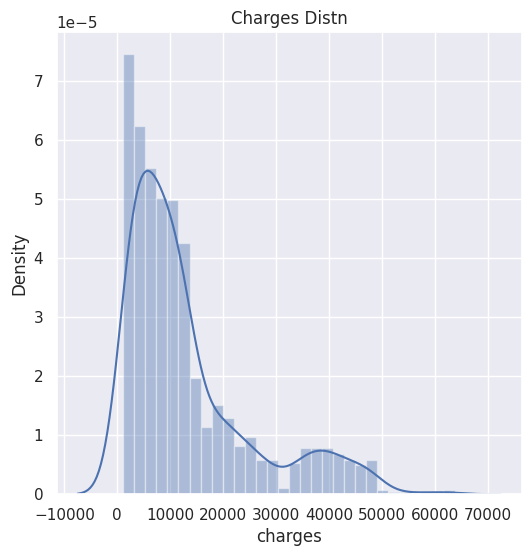

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(insuranceDataSet['charges'])
plt.title('Charges Distn')
plt.show()

Data Pre-processing


Need to encode the categorical features

In [ ]:
# encode the sex column
insuranceDataSet.replace(
    {
        'sex':{'male':0,'female':1}
    },
    inplace = True

)

In [ ]:
# encode the smoker column
insuranceDataSet.replace(
    {
        'smoker':{'yes':0,'no':1}
    },
    inplace = True

)

In [ ]:
# encode the region column
insuranceDataSet.replace(
    {
        'region':{'southeast':0,
                  'southwest':1,
                  'northeast':2,
                  'northwest':3
                  }
    },
    inplace = True

)

In [ ]:
# first five rows of data frame
insuranceDataSet.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Split the features and target

In [ ]:
# Make charges columns the features (1 represents column) and the values the row
X = insuranceDataSet.drop(columns='charges', axis = 1)
Y = insuranceDataSet['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


Split into Training Data and testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression Model<br>
How it works:<br>
- X is features<br>
- Y is Target\Prediction Probability<br>
- Linear regerssion tries to make line of best fit between features and target<br>
- equation: Y = mX + c<br>

In [ ]:
# loading the Linear regression model
regressor = LinearRegression()

In [ ]:
#plot for features of training data
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
# prediction on training data (predicts the Y value based on the training data)
trainingDataPrediction = regressor.predict(X_train)

In [ ]:
# Find the R squared value (if it lies between 0 and 1, if close to 1 then model
# performs well in general. However sometimes less R squared is better)
r2Train = metrics.r2_score(Y_train, trainingDataPrediction)

# Predict orignal training data and the mode predicted values
# Show the R2 value
print("R^2 val:",r2Train)

R^2 val: 0.751505643411174


In [ ]:
# prediction on training data (predicts the Y value based on the testing data)
testingDataPrediction = regressor.predict(X_test)

In [ ]:
# predict on test data (model doesn't know the output)
r2Test = metrics.r2_score(Y_test, testingDataPrediction)
print("R^2 val:",r2Test)

R^2 val: 0.7447273869684076


We observe no overfitting since the training data and testing data value is about the same<br>
If the training data value was huge and testing was small, then we would have seen overfitting.

Build a predicting system

In [ ]:
inputData = (31,1,25.74,0,1,0)

# Given these values model should predict the insurance cost
# Change the inputData to numpy array
inputAsNpArray = np.asarray(inputData)

# RESHAPE the array since we are only giving one data point so model doesn't
# expect 1000+ values like we trained it with.
inputDataReshaped = inputAsNpArray.reshape(1,-1)


In [ ]:
prediction = regressor.predict(inputDataReshaped)
print(prediction)

print('The insurance cost is USD', prediction)

[3760.0805765]
The insurance cost is USD [3760.0805765]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
